In [55]:
import pandas as pd
# Libraries to work with dataframe
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets
import statsmodels.api as sm

In [56]:
Calgary_df= pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\Fina_Lhl_project1\Final_Lhl_Project\weather project csv file\uptodatecalgary.csv', index_col="DATE")

In [57]:
Calgary_df

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,9.0,-5.0,NaN,NaN
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,24.0,NaN,NaN,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,16.0,2.0,NaN,NaN
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,27.0,NaN,NaN,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,NaN,37.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,53.0,58.0,49.0,NaN,NaN
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,63.0,77.0,50.0,14.0,69.3
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,70.0,90.0,51.0,33.0,107.4


In [58]:
Calgary_df.loc["2018-01-01",:]

STATION                        CA003031094
NAME       CALGARY INTERNATIONAL CS, AB CA
PRCP                                   0.0
SNWD                                   4.3
TAVG                                   0.0
TMAX                                  26.0
TMIN                                 -26.0
WDFG                                   0.0
WSFG                                   0.0
Name: 2018-01-01, dtype: object

cleaning

In [59]:
# calculate null percentage

In [60]:
#find the no of null value in this  columns
Calgary_df.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP         56
SNWD       3140
TAVG       2258
TMAX         29
TMIN         32
WDFG       3048
WSFG       3048
dtype: int64

In [61]:
# to calculate the percentage of null divided by the no of rows
null_pct = Calgary_df.apply(pd.isnull).sum() / Calgary_df.shape[0]
null_pct


STATION    0.000000
NAME       0.000000
PRCP       0.010646
SNWD       0.596958
TAVG       0.429278
TMAX       0.005513
TMIN       0.006084
WDFG       0.579468
WSFG       0.579468
dtype: float64

In [62]:
#select column
Calgary1_df =Calgary_df.iloc[:, [0,1,2,3,5,6]].copy()

In [63]:
Calgary1_df

,STATION,NAME,PRCP,SNWD,TMAX,TMIN
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


In [64]:
Calgary1_df.columns = ["STATION","Name","precip","snow_depth","temp_max", "temp_min"]

In [65]:
Calgary1_df

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


clean up the data and fill null values

In [66]:
Calgary1_df["snow_depth"]. value_counts()

snow_depth
0.0     333
0.4     303
2.8     185
1.2     164
0.8     147
2.0     139
2.4     131
1.6     130
3.1     124
3.5      86
3.9      84
4.3      64
4.7      50
5.1      37
6.3      35
5.5      35
5.9      20
7.5      14
6.7      13
7.1       8
7.9       5
9.4       3
8.7       3
9.1       2
8.3       1
9.8       1
11.4      1
10.2      1
10.6      1
Name: count, dtype: int64

verify correct data types

In [67]:
Calgary1_df.dtypes

STATION        object
Name           object
precip        float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [68]:
Calgary1_df.index

Index(['2008-12-23', '2008-12-24', '2008-12-25', '2008-12-26', '2008-12-27',
       '2008-12-28', '2008-12-29', '2008-12-30', '2008-12-31', '2009-01-01',
       ...
       '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
       '2023-07-28', '2023-07-29', '2023-07-30', '2023-07-31', '2023-08-01'],
      dtype='object', name='DATE', length=5260)

In [69]:
# convert out DATE into a datetime
Calgary1_df.index= pd.to_datetime(Calgary1_df.index)

In [70]:
Calgary1_df.index

DatetimeIndex(['2008-12-23', '2008-12-24', '2008-12-25', '2008-12-26',
               '2008-12-27', '2008-12-28', '2008-12-29', '2008-12-30',
               '2008-12-31', '2009-01-01',
               ...
               '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26',
               '2023-07-27', '2023-07-28', '2023-07-29', '2023-07-30',
               '2023-07-31', '2023-08-01'],
              dtype='datetime64[ns]', name='DATE', length=5260, freq=None)

In [71]:
# we can check  day month ,year
Calgary1_df.index.year

Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=5260)

In [72]:
Calgary1_df.index.day_of_year

Index([358, 359, 360, 361, 362, 363, 364, 365, 366,   1,
       ...
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213],
      dtype='int32', name='DATE', length=5260)

In [73]:
Calgary1_df.index.month

Index([12, 12, 12, 12, 12, 12, 12, 12, 12,  1,
       ...
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8],
      dtype='int32', name='DATE', length=5260)

In [74]:
#checking for gaps
Calgary1_df.index.year.value_counts().sort_index()

DATE
2008      9
2009    363
2010    362
2011    362
2012    364
2013    329
2014    362
2015    363
2016    358
2017    360
2018    360
2019    363
2020    364
2021    363
2022    365
2023    213
Name: count, dtype: int64

Replace null value .

In [75]:
# select where row is null for min
Calgary1_df[pd.isnull(Calgary1_df["temp_min"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
2008-12-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.06,3.9,20.0,NaN
2008-12-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.01,4.3,17.0,NaN
2008-12-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.03,6.7,NaN,NaN
2008-12-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,NaN


In [76]:
# select where row is null for max
Calgary1_df[pd.isnull(Calgary1_df["temp_max"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.03,6.7,NaN,NaN
2008-12-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,NaN
2009-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-06,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-07,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN


In [77]:
# select where row is null for snow_depth
Calgary1_df[pd.isnull(Calgary1_df["snow_depth"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,44.0,15.0
2009-04-07,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,54.0,28.0
2009-04-17,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,60.0,26.0
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


replace null values in snowdepth with 0

In [78]:
Calgary1_df

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


In [79]:
# select where row is null for snow_depth
Calgary1_df[pd.isnull(Calgary1_df["snow_depth"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,44.0,15.0
2009-04-07,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,54.0,28.0
2009-04-17,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,60.0,26.0
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


<Axes: xlabel='DATE'>

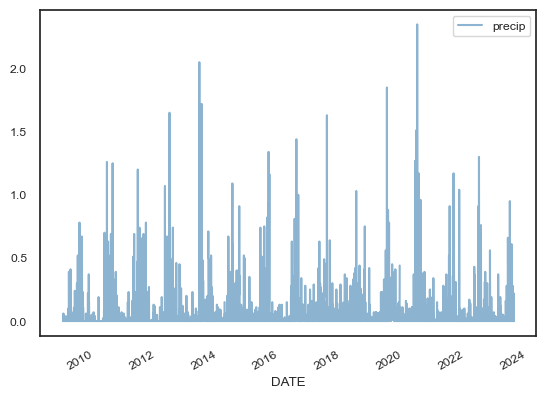

In [80]:
Calgary1_df[["precip"]].plot()

<Axes: xlabel='DATE'>

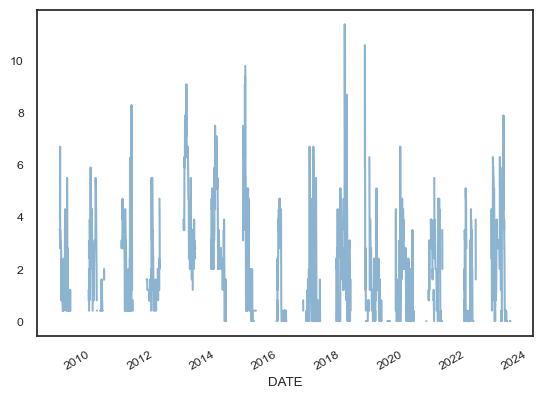

In [81]:
Calgary1_df["snow_depth"].plot()

In [82]:
Calgary1_df['snow_depth'].fillna(0, inplace=True)

more than 6inches of snow  are present  with the highest more than 10inches in 2018. 2020 has 6inches 

In [83]:
#tomorrows temp_max	

In [84]:
#fill all  values with the previous ones in temp_max and temp_min and others. this is called forward fill
Calgary1c_df = Calgary1_df.fillna(method="ffill")

In [85]:
Calgary1c_df.head()

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,24.0,-5.0
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,27.0,2.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,0.0,37.0,2.0


In [86]:
Calgary1c_df.loc["2009-01-31",:]

STATION                           CA003031094
Name          CALGARY INTERNATIONAL CS, AB CA
precip                                    0.0
snow_depth                                0.0
temp_max                                 44.0
temp_min                                 15.0
Name: 2009-01-31 00:00:00, dtype: object

<Axes: xlabel='DATE'>

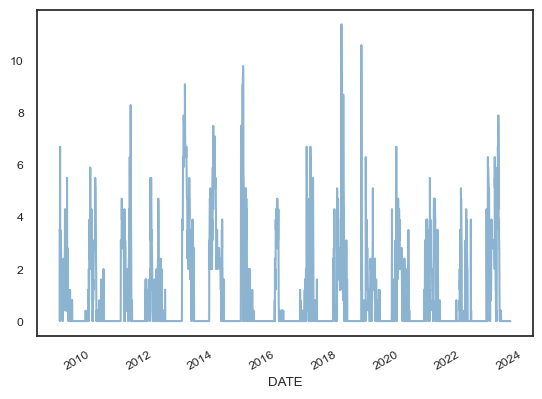

In [87]:
Calgary1_df["snow_depth"].plot()

In [88]:
#tomorrows temp_max	

analysing weather data

<Axes: xlabel='DATE'>

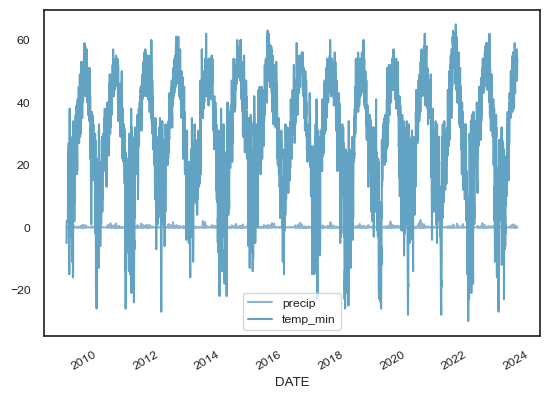

In [89]:
Calgary1c_df[["precip","temp_min"]].plot()

<Axes: xlabel='DATE'>

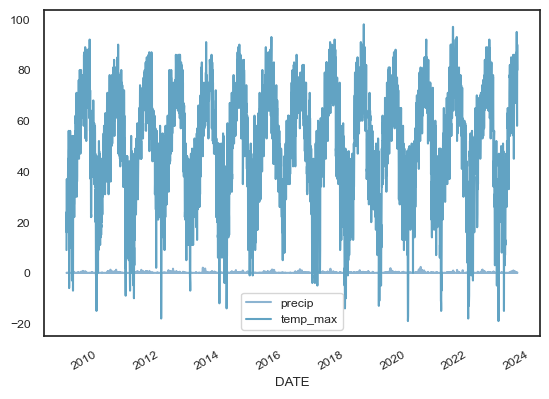

In [90]:
Calgary1c_df[["precip","temp_max"]].plot()

<Axes: xlabel='DATE'>

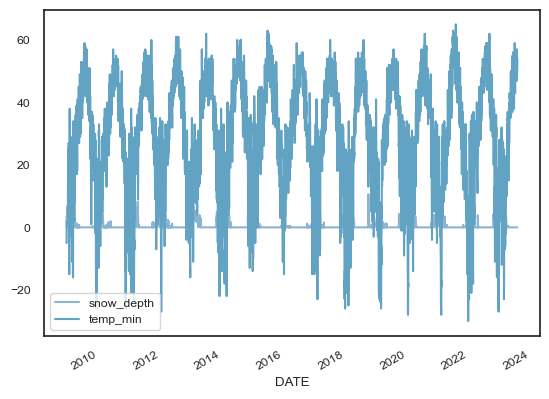

In [91]:
Calgary1c_df[["snow_depth","temp_min"]].plot()

<Axes: xlabel='DATE'>

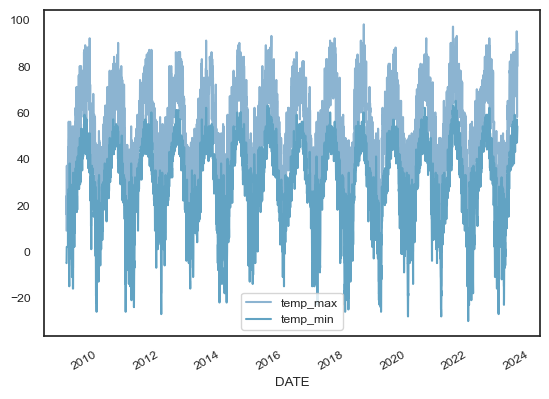

In [92]:
Calgary1c_df[["temp_max","temp_min"]].plot()

<Axes: xlabel='DATE'>

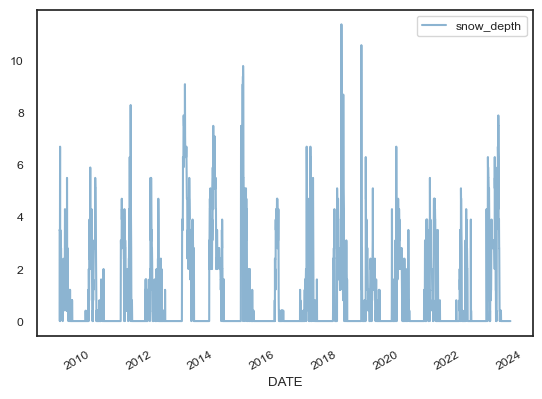

In [93]:
# plot of snow_depth after filling
Calgary1c_df[["snow_depth"]].plot()

<Axes: xlabel='DATE'>

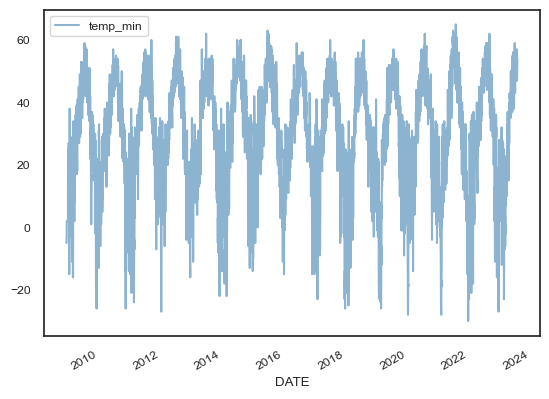

In [94]:
Calgary1c_df[["temp_min"]].plot()

In [95]:
import pandas as pd
features = ["precip","snow_depth","temp_max", "temp_min"]

# Grouping by 'Year' and 'Month' and calculating the mean values for weather features
yearmonth_weather_avg = Calgary1c_df.groupby([Calgary1_df.index.year,Calgary1_df.index.month])[features].mean()

# Displaying the calculated averages
yearmonth_weather_avg


precip  snow_depth   temp_max   temp_min
DATE DATE                                            
2008 12    0.011111    3.522222  20.444444   0.444444
2009 1     0.004194    1.716129  31.064516   9.161290
     2     0.005357    1.542857  28.928571   9.428571
     3     0.039355    1.706452  34.161290  13.096774
     4     0.005000    0.480000  49.166667  26.033333
...             ...         ...        ...        ...
2023 4     0.008000    0.133333  52.266667  27.300000
     5     0.031613    0.000000  71.677419  43.612903
     6     0.082000    0.000000  72.833333  47.300000
     7     0.052581    0.000000  77.064516  51.064516
     8     0.000000    0.000000  80.000000  54.000000

[177 rows x 4 columns]

In [96]:
# checking total weather condition per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",0.10,31.7,184.0,4.0
2009,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",9.45,240.5,18212.0,9808.0
2010,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",13.02,226.1,18299.0,10513.0
2011,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.95,343.0,17969.0,10437.0
2012,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.49,171.7,18623.0,10967.0
2013,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.09,730.8,16326.0,9300.0
2014,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.51,478.4,18147.0,10741.0
2015,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",25.90,121.7,19518.0,11657.0
2016,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.34,168.4,18921.0,11047.0


In [97]:
#temp_max per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["snow_depth"]

DATE
2008     31.7
2009    240.5
2010    226.1
2011    343.0
2012    171.7
2013    730.8
2014    478.4
2015    121.7
2016    168.4
2017    255.2
2018    393.4
2019    257.5
2020    245.6
2021    213.1
2022    250.3
2023    280.7
Name: snow_depth, dtype: float64

<Axes: xlabel='DATE'>

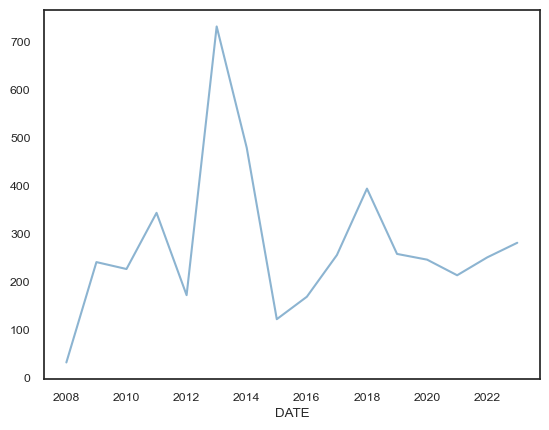

In [98]:
#snow-depth per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["snow_depth"].plot()

<Axes: xlabel='DATE'>

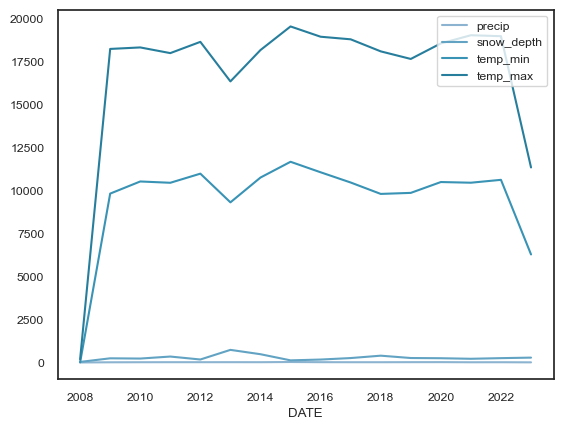

In [99]:
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()[["precip", "snow_depth", "temp_min", "temp_max"]].plot()


In [100]:
#prep per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["precip"]

DATE
2008     0.10
2009     9.45
2010    13.02
2011    14.95
2012    14.49
2013    16.09
2014    14.51
2015    25.90
2016    16.34
2017    13.43
2018    13.24
2019    16.88
2020    18.83
2021    10.89
2022    12.98
2023     6.48
Name: precip, dtype: float64

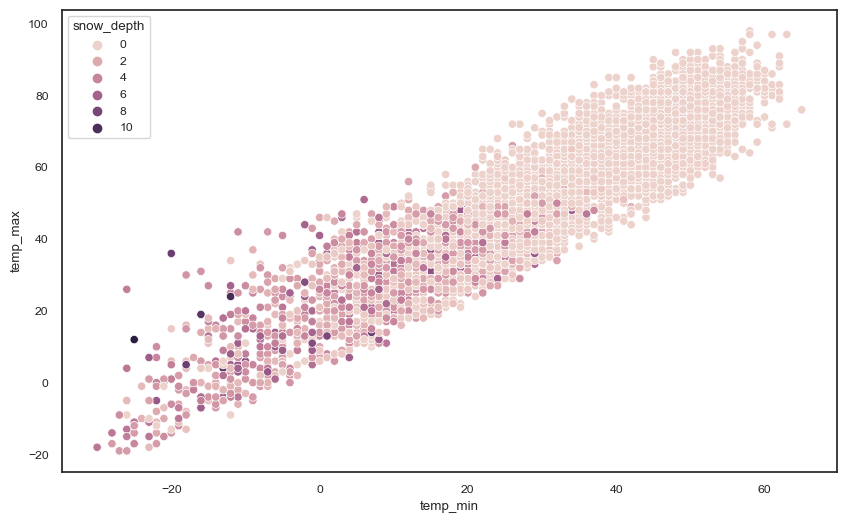

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
plt_fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=Calgary1c_df, x='temp_min', y='temp_max', hue='snow_depth')

plt.show()


In [103]:
Calgary1c_df

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,-5.0
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,2.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,37.0,2.0
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,90.0,51.0


===================================================================================================

In [137]:
predictors_columns = ["precip", "snow_depth", "temp_max", "temp_min"]
Calgary1c_predictors_df = Calgary1c_df[predictors_columns]


In [138]:
Calgary1c_predictors_df 

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2008-12-23,0.00,3.5,9.0,-5.0
2008-12-24,0.00,3.5,24.0,-5.0
2008-12-25,0.00,3.5,16.0,2.0
2008-12-26,0.00,3.5,27.0,2.0
2008-12-27,0.00,0.0,37.0,2.0
...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0
2023-07-29,0.00,0.0,77.0,50.0
2023-07-30,0.00,0.0,90.0,51.0


In [139]:
X = Calgary1c_predictors_df.drop(['snow_depth'], axis =1)
y = Calgary1c_predictors_df['snow_depth']

In [140]:
X.head()

,precip,temp_max,temp_min
DATE,,,
2008-12-23,0.0,9.0,-5.0
2008-12-24,0.0,24.0,-5.0
2008-12-25,0.0,16.0,2.0
2008-12-26,0.0,27.0,2.0
2008-12-27,0.0,37.0,2.0


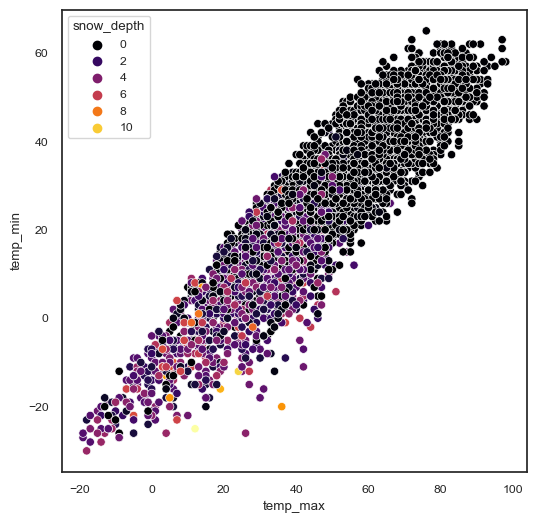

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x='temp_max', y='temp_min', hue='snow_depth', palette='inferno', data=Calgary1c_selected_df)

plt.show()


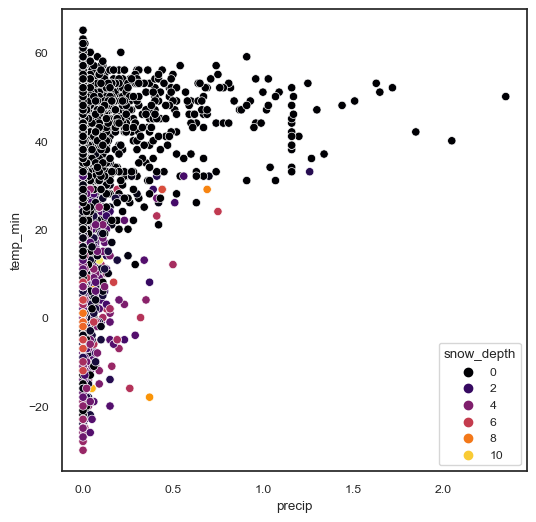

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x='precip', y='temp_min', hue='snow_depth', palette='inferno', data=Calgary1c_selected_df)

plt.show()


In [116]:
#import libraries spliting
from sklearn.model_selection import train_test_split

In [119]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3682, 3), (1578, 3))

In [121]:
y_train.shape , y_test.shape

((3682,), (1578,))

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression model
lr_model = LinearRegression()

# Fit the training data
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LinearRegression Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


LinearRegression Metrics:
Mean Squared Error: 1.5038144241301028
Mean Absolute Error: 0.8332279470701504
R-squared: 0.37690187358340643


In [134]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(max_depth=5)

# Fit training data
dt_model.fit(X_train, y_train)

# predictions the testing data
y_pred = dt_model.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("DecisionTreeRegressor Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



DecisionTreeRegressor Metrics:
Mean Squared Error: 1.456013843571567
Mean Absolute Error: 0.6926866502947261
R-squared: 0.39670780954846296


Based on these matrics, the Decision Tree Regression model appears to perform slightly better than the Linear Regression model in terms of both MSE and MAE, while also having a slightly higher R-squared value. This suggests that the Decision Tree Regression model might capture the underlying patterns in this data more effectively. however,it is important to further analyze and potentially improve the models, explore feature engineering, and consider the broader context of this analysis before making a final decision.

In [136]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ridge Regression model
ridge_model = Ridge(alpha=0.1)  

# Fit training data
ridge_model.fit(X_train, y_train)

# Make predictions for the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Ridge Regression Metrics:
Mean Squared Error: 1.5038137003666585
Mean Absolute Error: 0.8332276125384601
R-squared: 0.37690217347123767


I chose Ridge regression because ridge regression model penalizes coefficients to account for multi-collinearity.   

ensemble

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
# Fit the training data
rf_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Print the evaluation metrics for RandomForestRegressor
print("RandomForestRegressor Metrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)



RandomForestRegressor Metrics:
Mean Squared Error: 1.52982569493493
Mean Absolute Error: 0.7045937623516385
R-squared: 0.36612423118010406


In [133]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
# Fit the model to the training data
gb_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = gb_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Print the evaluation metrics for RandomForestRegressor
print("GradientBoostingRegressorMetrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)


GradientBoostingRegressorMetrics:
Mean Squared Error: 1.4457156481461655
Mean Absolute Error: 0.702892882583998
R-squared: 0.4009748162828555


Comparing the metrics, the GradientBoostingRegressor outperforms the RandomForestRegressor in terms of all three metrics: lower MSE, slightly lower MAE, and higher R-squared. This indicates that the GradientBoostingRegressor is better capturing the patterns in the data and providing more accurate predictions,but it's important to  perform additional model tuning or exploration to ensure the best possible fit .

===================================================================================================================================

exploring  more feature engineering by creating more predictors, and considering the broader context of this analysis before making a final decision. lets start with predicting tomorrows snow_depth.

target variable = snow_depth while others are the predictors

In [143]:
# target is snow_depth
Calgary1c_df["target"] = Calgary1c_df. shift(-1)["snow_depth"]

In [144]:
Calgary1c_df

,STATION,Name,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0,3.5
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,-5.0,3.5
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0,3.5
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,2.0,0.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,37.0,2.0,3.9
...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0,0.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0,0.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,90.0,51.0,0.0


 the above predicted tomorrows snow_depth from today eg the target (3.5 cm) of 2008-12-24 is tomorrows  (3.5). it helps predict tomorrows maximum temp.

Notice the last target for 2023-08-1 has NAN this is because the last data i downloaded was on that day,we will can fill the data with the previous value. ((   'r' in Calgary1cf_df mean fill))

In [145]:
Calgary1cf_df= Calgary1c_df.ffill()

In [146]:
Calgary1cf_df

,STATION,Name,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0,3.5
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,-5.0,3.5
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0,3.5
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,2.0,0.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,37.0,2.0,3.9
...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0,0.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0,0.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,90.0,51.0,0.0


In [ ]:
#snow-depth per year
#Calgary1cf_df.groupby(Calgary1cf_df.index.year).sum()['snow_depth','target'].plot()

In [ ]:
Calgary1cfs_df= Calgary1cf_df[['precip','snow_depth','temp_max','temp_min','target']]

In [ ]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,
2008-12-23,0.00,3.5,9.0,-5.0,3.5
2008-12-24,0.00,3.5,24.0,-5.0,3.5
2008-12-25,0.00,3.5,16.0,2.0,3.5
2008-12-26,0.00,3.5,27.0,2.0,0.0
2008-12-27,0.00,0.0,37.0,2.0,3.9
...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0
2023-07-29,0.00,0.0,77.0,50.0,0.0
2023-07-30,0.00,0.0,90.0,51.0,0.0


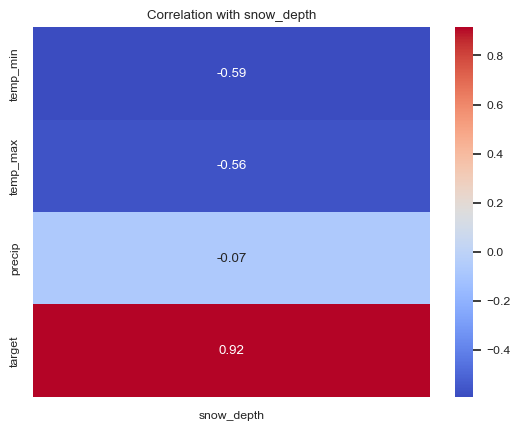

In [147]:
corr = Calgary1cfs_df.corr()
target_corr = corr['snow_depth'].drop('snow_depth')

target_corr_sorted = target_corr.sort_values(ascending=True)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with snow_depth')
plt.show()

In [148]:
#Compute the correlation matrix
corr= Calgary1cfs_df.corr()
corr

,precip,snow_depth,temp_max,temp_min,target
precip,1.000000,-0.072822,0.040950,0.155116,-0.034816
snow_depth,-0.072822,1.000000,-0.564854,-0.591325,0.915398
temp_max,0.040950,-0.564854,1.000000,0.918778,-0.585227
temp_min,0.155116,-0.591325,0.918778,1.000000,-0.599270
target,-0.034816,0.915398,-0.585227,-0.599270,1.000000


explain correllation.

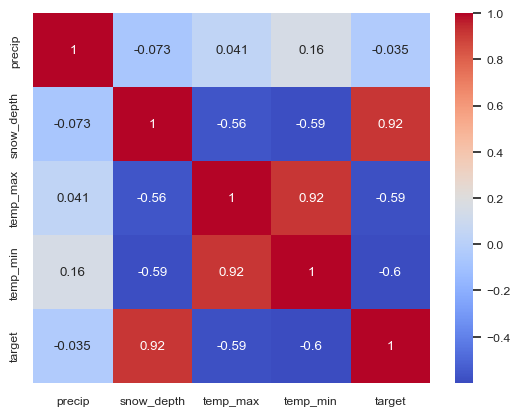

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix


# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

=========================================================================================================================

Tuning an

Application of machine learning.
ridge regression model penalizes coefficients to account for multi-collinearity.

use regression model because it reduces overfitting

In [150]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha (regularization strength) default value


In [151]:
# select columns in this list except the target. ~ meaning negation.
predictors = Calgary1cfs_df.columns[~Calgary1cfs_df.columns.isin(["target"])] 
predictors

Index(['precip', 'snow_depth', 'temp_max', 'temp_min'], dtype='object')

since it is a time series data, we will use time series cross validation or back testing to account for the time series nature of the data.. we have to be careful not to use today's  value to predict yesterday.

In [152]:
# the function  take in the data, model, predictors, start parameter  of 365 days before we start predictions and this is for a period of 30 days we create a set of predictions and move on to the next 30 days.. this can be adjusted.
def backtest(Calgary1cfs_df,ridge_model,predictors,start=365,step=30):
    all_predictions=[]

    for i in range(start, Calgary1cfs_df.shape[0], step):
        train = Calgary1cfs_df.iloc[:i,:]
        test = Calgary1cfs_df.iloc[i:i+step,:]

        ridge_model.fit(train[predictors], train["target"])

        preds =ridge_model.predict(test[predictors])

        preds  = pd.Series(preds, index=test.index)

        combined= pd.concat([test["target"],preds], axis=1)
        combined.columns= ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
        return pd.concat(all_predictions)

In [153]:
predictions = backtest(Calgary1cfs_df, ridge_model, predictors)

In [154]:
predictions

,actual,prediction,diff
DATE,,,
2009-12-25,2.4,2.168004,0.231996
2009-12-26,2.4,2.044301,0.355699
2009-12-27,2.0,2.036192,0.036192
2009-12-28,2.4,1.835394,0.564606
2009-12-29,2.4,2.147724,0.252276
2009-12-30,3.1,2.276837,0.823163
2009-12-31,3.5,2.882465,0.617535
2010-01-01,4.3,3.014750,1.285250
2010-01-02,3.9,3.385934,0.514066


The diff show the  how accurate our prediction is we will immport mean_absolute_error

In [155]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [156]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

0.4454111795866166

In [157]:
predictions["diff"].mean()

0.4454111795866166

In summary, your calculated MAE value of 0.4454 suggests that, on average, the absolute difference between the predicted and actual values is approximately 0.4454 units. Lower MAE values indicate better model performance in terms of accuracy and closeness of predictions to the actual values.

on average, we are 8.8 degrees off in our prediction.

In [158]:
r2_ridge = r2_score(predictions["actual"], predictions["prediction"])
r2_ridge

0.8536658735219828

In [ ]:
#combined.plot()

In [159]:
rmse_ridge = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)
rmse_ridge

0.5583532508389838

In [160]:
ridge_model.coef_

array([ 0.0912466 ,  0.65577987, -0.00675996, -0.00709719])

These coefficients indicate the direction and magnitude of the relationship between each predictor and the target variable 
For the 'precip' predictor,Coefficient is 0.0912466 and this is is associated with an approximate increase of 0.0912466 units in the predicted target variable (given that all other predictors are held constant). This positive coefficient implies that higher precipitation is generally associated with a higher predicted target value.
For the 'snow_depth' predictor, the Coefficient is 0.65577987 and A one-unit increase in the snow_depth feature corresponds to an estimated increase of 0.65577987 units in the predicted target variable. This coefficient is also positive, indicating that higher snow depth is associated with a higher predicted target value.
For the 'temp_max' predictor, the Coefficient is  -0.00675996 and ssuggests that a one-unit increase in the temp_max feature is associated with a decrease of approximately 0.00675996 units in the predicted target variable. A negative coefficient implies that higher maximum temperatures are associated with lower predicted target values. 
For the 'temp_min' predictor, -0.00709719 a one-unit increase in the temp_min feature is associated with a decrease of about -0.00709719 units in the predicted target variable. This is also a negative coefficient, indicating that higher minimum temperatures are associated with lower predicted target values.





 MAE value of 0.4454111795866166 is better than a MAE value of 0.7045937623516385. In other words, the model with the MAE of 0.4454111795866166 has a smaller average absolute difference between predicted and actual values, which suggests that it is making more accurate predictions compared to the model with the higher MAE

Comparing these metrics, the best Ridge Regression model appears to perform better than the RandomForestRegressor model:

The Ridge Regression model has a significantly lower Mean Absolute Error (0.445) compared to the RandomForestRegressor (0.705), indicating that the Ridge Regression model's predictions are closer to the actual values on average.
The Ridge Regression model has a higher R-squared value (0.854) compared to the RandomForestRegressor (0.366), indicating that a larger proportion of the variance in the target variable is explained by the Ridge Regression model.
The Ridge Regression model also has a lower Mean Squared Error (0.558) compared to the RandomForestRegressor (1.530), indicating that the squared differences between predicted and actual values are smaller for the Ridge Regression model.
Based on these metrics, the Ridge Regression model seems to be the better performer among the two models

===========================================================================================================================
===========================================================================================================================

how to improve our accuracy. calculate the average temperature and precipitation in the past few days, 3,14 days and looking how the current day compare to those days.

d

In [161]:
def pct_diff(old, new):
    return (new - old) / old  # return new minus old divided by old.

def compute_rolling(Calgary1cfs_df, horizon, col):
    label = f"rolling_{horizon}_{col}"  # to create a label.... used to create a dynamic string
    Calgary1cfs_df[label] = Calgary1cfs_df[col].rolling(horizon).mean()  # note that rolling mean takes the values from previous dates to calculate over the horizon
    Calgary1cfs_df[f"{label}_pct"] = pct_diff(Calgary1cfs_df[label], Calgary1cfs_df[col])  # to find percentage difference between the current day and the rolling

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["precip", "snow_depth", "temp_max", "temp_min"]:
        compute_rolling(Calgary1cfs_df, horizon, col)
        
Calgary1cfs_df


C:\Users\layin\AppData\Local\Temp\ipykernel_22140\2205066882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Calgary1cfs_df[label] = Calgary1cfs_df[col].rolling(horizon).mean()  # note that rolling mean takes the values from previous dates to calculate over the horizon


,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_3_temp_min,rolling_3_temp_min_pct,rolling_14_precip,rolling_14_precip_pct,rolling_14_snow_depth,rolling_14_snow_depth_pct,rolling_14_temp_max,rolling_14_temp_max_pct,rolling_14_temp_min,rolling_14_temp_min_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2008-12-23,0.00,3.5,9.0,-5.0,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-24,0.00,3.5,24.0,-5.0,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-25,0.00,3.5,16.0,2.0,3.5,0.000000,NaN,3.500000,0.0,16.333333,...,-2.666667,-1.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-26,0.00,3.5,27.0,2.0,0.0,0.000000,NaN,3.500000,0.0,22.333333,...,-0.333333,-7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-27,0.00,0.0,37.0,2.0,3.9,0.000000,NaN,2.333333,-1.0,26.666667,...,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.000000,NaN,66.000000,...,48.000000,0.020833,0.048571,3.529412,0.0,NaN,77.857143,-0.255046,51.928571,-0.056396
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.000000,NaN,66.666667,...,48.666667,0.027397,0.045714,-1.000000,0.0,NaN,77.785714,-0.010101,51.642857,-0.031812
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.000000,NaN,75.000000,...,50.000000,0.020000,0.045714,-1.000000,0.0,NaN,78.428571,0.147541,51.428571,-0.008333


cut off the first 14 days with missing valuea because there is no prediction for them.

In [162]:
Calgary1cfs_df = Calgary1cfs_df.iloc[14:,:]

In [ ]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_3_temp_min,rolling_3_temp_min_pct,rolling_14_precip,rolling_14_precip_pct,rolling_14_snow_depth,rolling_14_snow_depth_pct,rolling_14_temp_max,rolling_14_temp_max_pct,rolling_14_temp_min,rolling_14_temp_min_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,2.8,0.000000,NaN,3.0,-0.066667,17.000000,...,2.000000,0.000000,0.010714,-1.000000,3.128571,-0.105023,19.785714,-0.140794,1.500000,0.333333
2009-01-07,0.00,2.8,17.0,2.0,2.8,0.000000,NaN,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.010714,-1.000000,3.078571,-0.090487,19.285714,-0.118519,2.000000,0.000000
2009-01-08,0.02,2.8,17.0,2.0,2.8,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.012143,0.647059,3.028571,-0.075472,19.357143,-0.121771,2.000000,0.000000
2009-01-09,0.02,2.8,36.0,2.0,2.8,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.013571,0.473684,2.978571,-0.059952,20.000000,0.800000,2.000000,0.000000
2009-01-10,0.00,2.8,39.0,23.0,2.8,0.013333,-1.0000,2.8,0.000000,30.666667,...,9.000000,1.555556,0.013571,-1.000000,3.178571,-0.119101,20.142857,0.936170,3.500000,5.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.0,NaN,66.000000,...,48.000000,0.020833,0.048571,3.529412,0.000000,NaN,77.857143,-0.255046,51.928571,-0.056396
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.0,NaN,66.666667,...,48.666667,0.027397,0.045714,-1.000000,0.000000,NaN,77.785714,-0.010101,51.642857,-0.031812
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.0,NaN,75.000000,...,50.000000,0.020000,0.045714,-1.000000,0.000000,NaN,78.428571,0.147541,51.428571,-0.008333


some NAN is still in the percentage columns(pct)  and we have to solve them by filling them with 0 in the next cell

In [163]:
Calgary1cfs_df =Calgary1cfs_df.fillna(0)

Add more predictions

In [164]:
def expand_mean(x):
    return x.expanding(1).mean()

for col in ["precip", "snow_depth", "temp_max", "temp_min"]:
    Calgary1cfs_df[f"month_avg_{col}"] = Calgary1cfs_df.groupby(Calgary1cfs_df.index.month)[col].apply(expand_mean).reset_index(level=0, drop=True)#(drop original index so it aligns with original df when assigning values back)
    Calgary1cfs_df[f"day_avg_{col}"] = Calgary1cfs_df.groupby(Calgary1cfs_df.index.day_of_year)[col].apply(expand_mean).reset_index(level=0, drop=True)


In [165]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,3.0,-0.066667,17.000000,...,1.500000,0.333333,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-07,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-08,0.02,2.8,17.0,2.0,2.8,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.006667,0.020000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-09,0.02,2.8,36.0,2.0,2.8,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.010000,0.020000,2.8,2.8,21.750000,36.000000,2.000000,2.000000
2009-01-10,0.00,2.8,39.0,23.0,2.8,0.013333,-1.0000,2.8,0.000000,30.666667,...,3.500000,5.571429,0.008000,0.000000,2.8,2.8,25.200000,39.000000,6.200000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.0,0.000000,66.000000,...,51.928571,-0.056396,0.074073,0.019286,0.0,0.0,74.791762,75.642857,51.160183,50.714286
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.0,0.000000,66.666667,...,51.642857,-0.031812,0.073904,0.022143,0.0,0.0,74.796804,77.714286,51.157534,51.642857
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.0,0.000000,75.000000,...,51.428571,-0.008333,0.073736,0.022857,0.0,0.0,74.831435,81.000000,51.157175,50.928571


Rerun our predictors, we have included some predictors lets see in our index.

In [166]:
#we can check our predictors now. .~ mean negation.
predictors = Calgary1cfs_df.columns[~Calgary1cfs_df.columns.isin(["target"])] 
predictors

Index(['precip', 'snow_depth', 'temp_max', 'temp_min', 'rolling_3_precip',
       'rolling_3_precip_pct', 'rolling_3_snow_depth',
       'rolling_3_snow_depth_pct', 'rolling_3_temp_max',
       'rolling_3_temp_max_pct', 'rolling_3_temp_min',
       'rolling_3_temp_min_pct', 'rolling_14_precip', 'rolling_14_precip_pct',
       'rolling_14_snow_depth', 'rolling_14_snow_depth_pct',
       'rolling_14_temp_max', 'rolling_14_temp_max_pct', 'rolling_14_temp_min',
       'rolling_14_temp_min_pct', 'month_avg_precip', 'day_avg_precip',
       'month_avg_snow_depth', 'day_avg_snow_depth', 'month_avg_temp_max',
       'day_avg_temp_max', 'month_avg_temp_min', 'day_avg_temp_min'],
      dtype='object')

predictors

In [167]:
 #Check for infinity values in each column
inf_columns =Calgary1cfs_df.columns[Calgary1cfs_df.applymap(np.isinf).any()]


inf_columns

Index(['rolling_3_temp_max_pct', 'rolling_3_temp_min_pct',
       'rolling_14_temp_min_pct'],
      dtype='object')

it needs cleaning because of this infinity in the columns, so it has to be dealth with by fill for our backtesting function to work. this ts done in the next cell.

In [168]:


Calgary1cfs_df = Calgary1cfs_df.replace([np.inf, -np.inf], np.nan)# code replace all infinite values with NAN using replace and then fill  with previous non nan value along the columns.
Calgary1cfs_df = Calgary1cfs_df.ffill()


In [ ]:
Calgary1cfs_df.apply(pd.isnull).sum()

precip                       0
snow_depth                   0
temp_max                     0
temp_min                     0
target                       0
rolling_3_precip             0
rolling_3_precip_pct         0
rolling_3_snow_depth         0
rolling_3_snow_depth_pct     0
rolling_3_temp_max           0
rolling_3_temp_max_pct       0
rolling_3_temp_min           0
rolling_3_temp_min_pct       0
rolling_14_precip            0
rolling_14_precip_pct        0
rolling_14_snow_depth        0
rolling_14_snow_depth_pct    0
rolling_14_temp_max          0
rolling_14_temp_max_pct      0
rolling_14_temp_min          0
rolling_14_temp_min_pct      0
month_avg_precip             0
day_avg_precip               0
month_avg_snow_depth         0
day_avg_snow_depth           0
month_avg_temp_max           0
day_avg_temp_max             0
month_avg_temp_min           0
day_avg_temp_min             0
dtype: int64

In [169]:
# backtest function to call our predictions
predictions = backtest(Calgary1cfs_df, ridge_model, predictors)

In [170]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,3.0,-0.066667,17.000000,...,1.500000,0.333333,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-07,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-08,0.02,2.8,17.0,2.0,2.8,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.006667,0.020000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-09,0.02,2.8,36.0,2.0,2.8,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.010000,0.020000,2.8,2.8,21.750000,36.000000,2.000000,2.000000
2009-01-10,0.00,2.8,39.0,23.0,2.8,0.013333,-1.0000,2.8,0.000000,30.666667,...,3.500000,5.571429,0.008000,0.000000,2.8,2.8,25.200000,39.000000,6.200000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.0,0.000000,66.000000,...,51.928571,-0.056396,0.074073,0.019286,0.0,0.0,74.791762,75.642857,51.160183,50.714286
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.0,0.000000,66.666667,...,51.642857,-0.031812,0.073904,0.022143,0.0,0.0,74.796804,77.714286,51.157534,51.642857
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.0,0.000000,75.000000,...,51.428571,-0.008333,0.073736,0.022857,0.0,0.0,74.831435,81.000000,51.157175,50.928571


In [171]:
mean_absolute_error(predictions["actual"], predictions["prediction"])


1.6213310636505958

In [172]:
r2_ridge = r2_score(predictions["actual"], predictions["prediction"])
r2_ridge

-1.8639832568976429

In [173]:
rmse_ridge = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)
rmse_ridge

1.8499805863728664

In [174]:
predictions["diff"].mean()

1.6213310636505958

In [175]:
ridge_model.coef_

array([-0.81860538,  0.25816222, -0.10003597, -0.18139603,  0.50546981,
        0.16793316,  0.3192771 , -0.00436933,  0.00987083,  0.00395773,
       -0.0056084 , -0.00921708,  0.15603926,  0.03427508,  0.22997902,
       -0.02266939, -0.00998094, -0.22417653,  0.00580836, -0.006741  ,
        1.49976057, -0.81860538, -0.24223481,  0.22174991,  0.00396174,
        0.09711625, -0.01333198,  0.18208819])

In [176]:
predictions.sort_values("diff", ascending= False) # to sshow days with errors

,actual,prediction,diff
DATE,,,
2010-01-23,1.2,-3.057775,4.257775
2010-01-24,0.8,-2.662802,3.462802
2010-01-08,3.5,0.773617,2.726383
2010-02-05,2.8,5.523246,2.723246
2010-01-30,2.4,4.922389,2.522389
2010-01-25,1.6,-0.845365,2.445365
2010-02-04,2.8,5.234805,2.434805
2010-02-06,2.8,5.083196,2.283196
2010-01-22,0.8,-1.161434,1.961434


In [177]:
Calgary1cfs_df.loc["2010-01-22":"2010-01-28"]

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-22,0.0,0.0,19.0,15.0,0.8,0.0,0.0,0.133333,-1.000000e+00,26.333333,...,22.214286,-0.324759,0.002500,0.0,1.708333,0.4,33.958333,24.0,12.041667,4.5
2010-01-23,0.0,0.8,19.0,16.0,1.2,0.0,0.0,0.400000,1.000000e+00,20.333333,...,22.000000,-0.272727,0.002449,0.0,1.689796,1.2,33.653061,6.5,12.122449,2.5
2010-01-24,0.0,1.2,18.0,11.0,0.8,0.0,0.0,0.666667,8.000000e-01,18.666667,...,20.571429,-0.465278,0.002400,0.0,1.680000,1.4,33.340000,6.5,12.100000,-2.0
2010-01-25,0.0,0.8,11.0,5.0,1.6,0.0,0.0,0.933333,-1.428571e-01,16.000000,...,18.857143,-0.734848,0.002353,0.0,1.662745,1.0,32.901961,13.0,11.960784,-5.0
2010-01-26,0.0,1.6,15.0,-2.0,1.2,0.0,0.0,1.200000,3.333333e-01,14.666667,...,16.357143,-1.122271,0.002308,0.0,1.661538,1.4,32.557692,16.0,11.692308,-6.5
2010-01-27,0.0,1.2,22.0,-6.0,1.2,0.0,0.0,1.200000,-5.551115e-16,16.000000,...,13.857143,-1.432990,0.002264,0.0,1.652830,1.2,32.358491,29.0,11.358491,2.0
2010-01-28,0.0,1.2,32.0,3.0,1.6,0.0,0.0,1.333333,-1.000000e-01,23.000000,...,12.285714,-0.755814,0.002222,0.0,1.644444,1.0,32.351852,33.5,11.203704,12.0


In [178]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0     2
1.0    15
2.0     8
3.0     4
4.0     1
Name: count, dtype: int64

<Axes: xlabel='diff'>

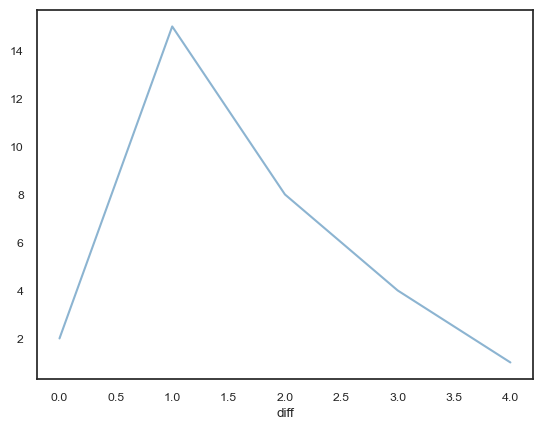

In [179]:
predictions["diff"].round().value_counts().sort_index().plot()

conclusion to improve the model, we always create more columns , add to the predictors and run it.

little variations occured as we can see.

In [180]:
ridge_model.coef_

array([-0.81860538,  0.25816222, -0.10003597, -0.18139603,  0.50546981,
        0.16793316,  0.3192771 , -0.00436933,  0.00987083,  0.00395773,
       -0.0056084 , -0.00921708,  0.15603926,  0.03427508,  0.22997902,
       -0.02266939, -0.00998094, -0.22417653,  0.00580836, -0.006741  ,
        1.49976057, -0.81860538, -0.24223481,  0.22174991,  0.00396174,
        0.09711625, -0.01333198,  0.18208819])

These coefficients represent the estimated impact of each predictor on the target variable (temp_min)
Precipitation (precip): 9.52623501 This indicate a positive coefficient indicates that an increase in precipitation is associated with an increase in the temp_min.
Analysis: This suggests that higher levels of precipitation are correlated with higher minimum temperatures. This might be due to the fact that rainy or wet conditions can lead to a warming effect, preventing temperatures from dropping as low.
Snow Depth (snow_depth): -0.80945195 :a negative coefficient indicates that an increase in snow depth is associated with a decrease in the temp_min.
Analysis: This suggests an inverse relationship between snow depth and minimum temperature. As snow accumulates, it tends to have a cooling effect on the surrounding environment, resulting in lower minimum temperatures.
Maximum Temperature (temp_max): 0.75077928 a positive coefficient indicates that an increase in maximum temperature is associated with an increase in the temp_min.
Analysis: This suggests that higher maximum temperatures are correlated with higher minimum temperatures. Warmer days might lead to milder nights, resulting in higher minimum temperatures.